### First steps with scikit-learn - training a perceptron  

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


#### Retorna las tres etiquetas de clase que tenemos para nuestro dataset:
- Iris-setosa
- Iris-versicolor
- Iris-virginica

##### Train and test datasets
Para ver que tan bien se desempeña nuestro modelo con datos que no conoce, procedemos a separar el dataset en training y test

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

- np.bincount(y)

Cuenta el número de ocurrencias de cada valor en y, y lo entrega a modo de lista

In [6]:
print("Labels counts in y:", np.bincount(y))
print("Labels counts in train:", np.bincount(y_train))
print("Labels counts in test:", np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in train: [35 35 35]
Labels counts in test: [15 15 15]


Muchos algorítmos de Machine Learning requieren, además, el escalado de características para un desempeño óptimo, como vimos en el caso del descenso del gradiente.

Utilizaremos la la clase *StandardScaler* del módulo **preprocessing** de scikit-learn

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Utilizando el método *fit*, StandardScaler estíma los parámetros $\mu$ (media) y $\sigma$ (desviación estandar) para cada característica del dataset.

Y con *transform* estandarizamos los datos de entrenamiento utilizando los parámetros, $\mu$ y $\sigma$

### Entrenemos nuestro modelo de perceptron
La mayoría de algorítmos en scikit-learn ya soportan la clasificación multiclase por defecto utilizando el método **one-vs.-rest(OvR)**.

In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, random_state=1)

Habiendo entrenado nuestro modelo en scikit-learn, podemos hacer predicciones a través del método *predict*:

In [9]:
y_pred = ppn.predict(X_test_std)

In [10]:
print("Misclassified examples: %d" % (y_test != y_pred).sum())

Misclassified examples: 2


### Calculémos la precisión en la clasificación de nuestro perceptron sobre el conjunto de test

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

Accuracy: 0.956


Cada clasificador en scikit-learn tiene su método *score* para calcular la precision del clasificador combinando la llamada *predict* con *accuracy_score*: 

In [13]:
print("Accuracy: %.3f" % ppn.score(X_test_std, y_test))

Accuracy: 0.956


### Plotting decision regions
Se plotean las 'decision regions' del modelo del perceptron y así podemos visualizar que tan bien separa este, las diferentes muestras de flores.

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [23]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor="black")
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='blue', edgecolor="black", alpha=0.2,
                    linewidth=1, marker="o",
                    s=100, label="test set")


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21148\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


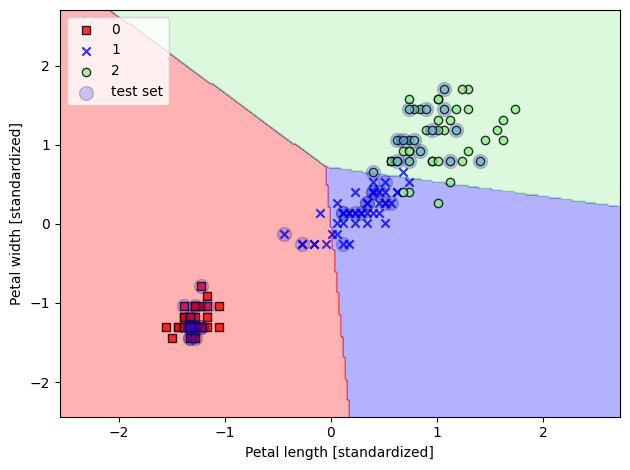

In [24]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [1]:
import numpy as np

b_ = np.float_(0.)

In [2]:
b_

0.0

In [3]:
array = [[1,1,6,8], [3,5,7,9], [10,11,13,2]]

In [4]:
arreglo = np.array(array)

In [8]:
arreglo.shape[1]

4

In [9]:
arreglo

array([[ 1,  1,  6,  8],
       [ 3,  5,  7,  9],
       [10, 11, 13,  2]])